## 1. 演示欠拟合与过拟合

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

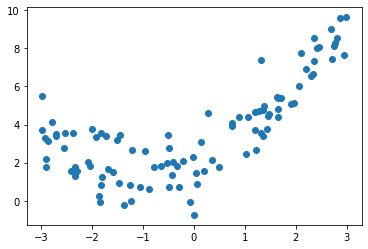

In [3]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)  # uniform产生具有均匀分布的数组; (100,)
# (100, )为秩为1的一维数组，既不是行向量又不是列向量
X = x.reshape(-1, 1)  # (100,1) 此为列向量

y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100) # normal产生正态分布的数组，均值为0，标准差为1
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

In [56]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X)
mean_squared_error(y, y_pred)

3.0750025765636577

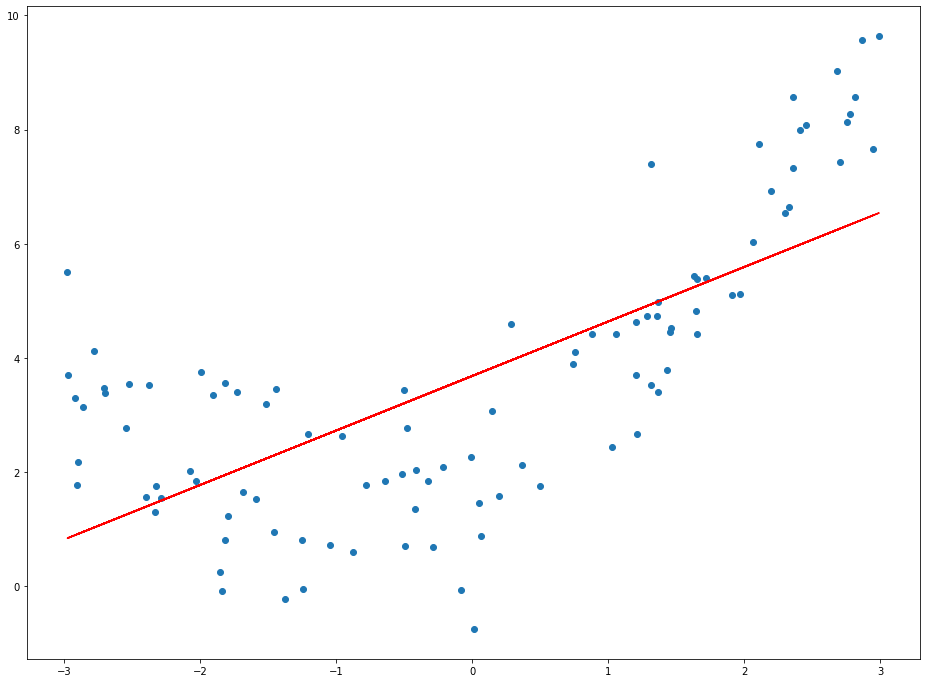

In [57]:
plt.figure(figsize=(16,12))
y_pred = lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x,y_pred,'r')

plt.show()

In [61]:
# 用多项式回归拟合，首先封装Pipeline管道，便于下一步灵活调整多项式回归模型参数
from sklearn.pipeline import Pipeline  # 管道就是“一条龙服务”
from sklearn.preprocessing import PolynomialFeatures  # 多项式回归
from sklearn.preprocessing import StandardScaler # 标准化

# 封装一个Pipeline管道
def PolynomialRegression(degree):
    return Pipeline([('poly', PolynomialFeatures(degree=degree)), # degree特征数量; degree=2的二次多项式则为（1,a,a^2,ab,b,b^2)
                     ('std_scaler', StandardScaler()),
                     ('lin_reg', LinearRegression())])

MSE:   1.0987392142417858
score:   0.819689285599819


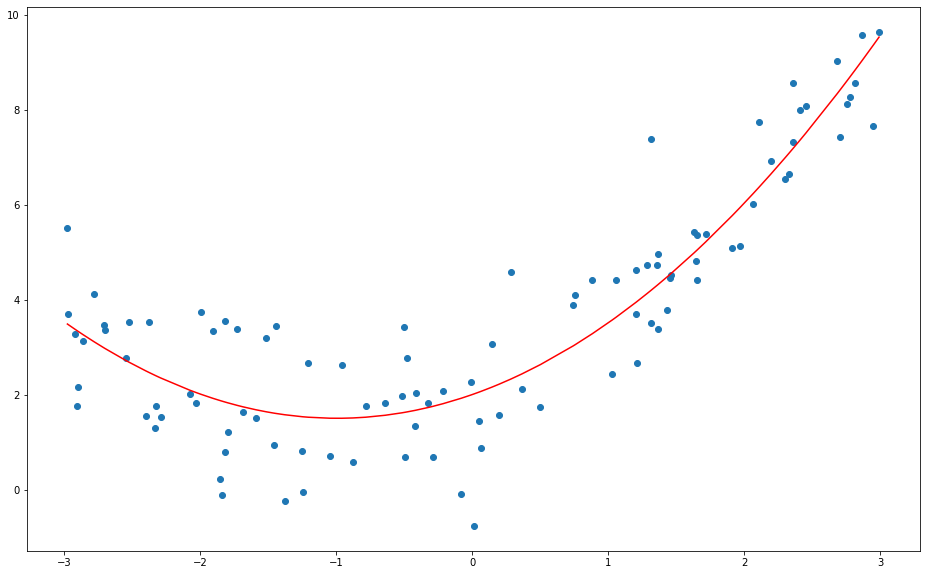

In [78]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y) # 
y2_pred = poly2_reg.predict(X)
print('MSE:  ', mean_squared_error(y, y2_pred))
print('score:  ', poly2_reg.score(X,y))

plt.figure(figsize=(16,10))
plt.scatter(x, y)

# plt.plot(x,y2_pred,color='b') # 这个连线会乱七八糟
plt.plot(np.sort(x), y2_pred[np.argsort(x)], color='r') 
# 这个真的秀，按序连线，将散点之间用直线连接起来了
plt.show()

MSE:   1.050846676376416
score:   0.8275487827443728


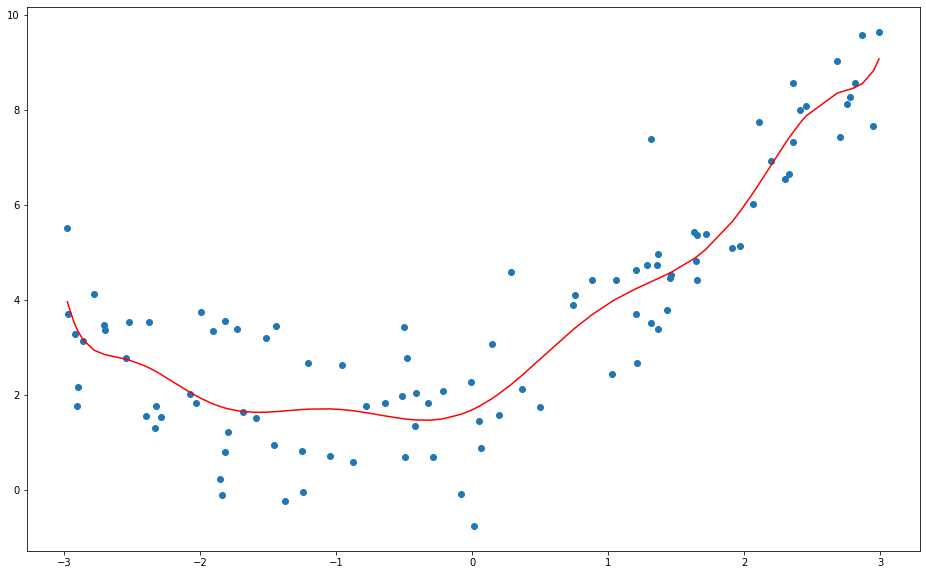

In [80]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y) # 
y2_pred = poly10_reg.predict(X)
print('MSE:  ', mean_squared_error(y, y2_pred))
print('score:  ', poly10_reg.score(X,y))

plt.figure(figsize=(16,10))
plt.scatter(x, y)

# plt.plot(x,y2_pred,color='b') # 这个连线会乱七八糟
plt.plot(np.sort(x), y2_pred[np.argsort(x)], color='r') 
# 这个真的秀，按序连线，将散点之间用直线连接起来了
plt.show()

MSE:   0.6803660559074705
score:   0.8883472183351842


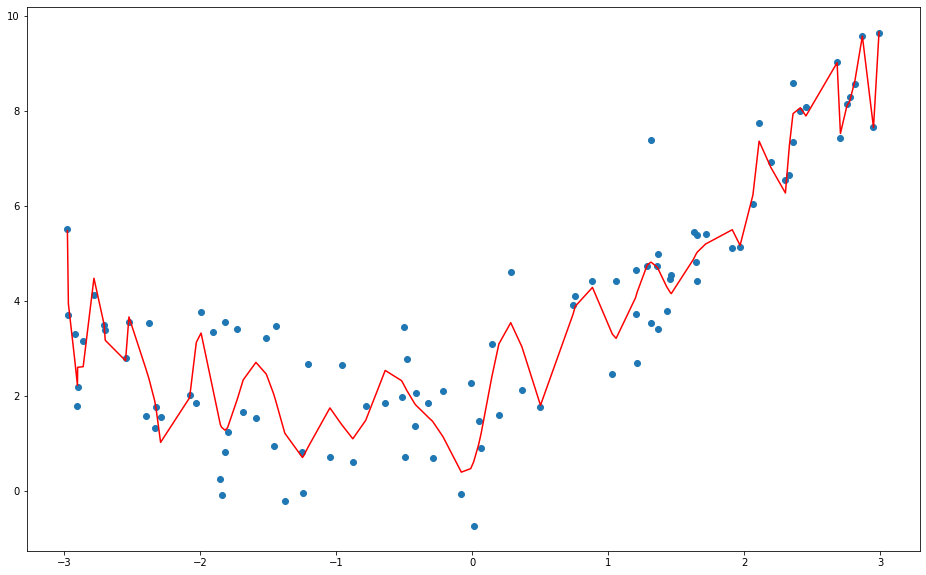

In [88]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y) # 
y2_pred = poly100_reg.predict(X)
print('MSE:  ', mean_squared_error(y, y2_pred))
print('score:  ', poly100_reg.score(X,y))

plt.figure(figsize=(16,10))
plt.scatter(x, y)

# plt.plot(x,y2_pred,color='b') # 这个连线会乱七八糟
plt.plot(np.sort(x), y2_pred[np.argsort(x)], color='r') 
# 这个真的秀，按序连线，将散点之间用直线连接起来了
plt.show()

可见，degree越大，模型均方误差越小，拟合的效果越好；总能找到一条曲线将所有的样本点拟合，使得整体的均方误差为0；
但在预测未知数据时，泛化能力降低，预测偏差增大。

## 2. 演示网格搜索调参法

In [17]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(f'Size of training set:{X_train.shape} \nSize of testing set:{X_test.shape}')
# grid search start
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C) # 共36种组合
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score 
            best_parameters = {'gamma':gamma, 'C':C}
# grid search end
display(best_parameters)
display(best_score) # for循环的块不产生一个作用域，不同于C语言

Size of training set:(112, 4) 
Size of testing set:(38, 4)


{'gamma': 0.001, 'C': 100}

0.9736842105263158